In [ ]:
## Identify fraud from Enron Email

### Enron became a symbol for fraud 
# The spectacular collapse of a giant american company in electric field was not only an end to the company
# but brought also a massive change for the american and global economy. 
# In 2001 Enron announced results for 3rd quarter and at the same time to a big surprise of shareholders a banckruptacy.
# In this project I'd like to focus on the most influencial workers of Enron which are obviously involved in the fraud.
# The most famous is CEO Jeffrey Keith "Jeff" Skilling and a chairman  Kenneth Lay of Enron 
# during most of the time when the crime occured.
# We will see their salaries, bonuses and stocks which are quite interesting.
# 

# Going through given dataset with e-mails within Enron co-workers we will discover a POI - Person of Interest,
# basically a person suspected to participate in the fraud.
# 


In [87]:
# Firstly, let's load the necessary data and packages. 
# I am going to create a dataframe in pandas and then with the use of numpy arrays and matplotlib visualize it.
# To further analysis in classyfing will need Sklearn, GaussianNB,... i co jeszcze?

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.grid_search import GridSearchCV
from time import time

import pandas as pd
get_ipython().magic(u'matplotlib inline')
from matplotlib import pyplot as plt


### Let's load my dictionary providede by Udacity
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [88]:
# Let's check the type of my dataset, as we see it's a dictionary
type(data_dict)

dict

In [89]:
# By converting the dictionary to a dataframe with pandas it will be easier and faster to work with it:
enron_dataf = pd.DataFrame.from_records(list(data_dict.values()))


In [90]:
# Previosly the index were numbers, but it's easier to set them as names of employees series:
employees = pd.Series(list(data_dict.keys()))
enron_dataf.set_index(employees, inplace=True)
enron_dataf.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


In [91]:
# Let's load the data and answer a few simple questions:

In [92]:
# Here we see the whole data_set

In [93]:
# Let's see what features we have about the Enron's CEO:

enron_dataf.loc['SKILLING JEFFREY K']

bonus                                        5600000
deferral_payments                                NaN
deferred_income                                  NaN
director_fees                                    NaN
email_address                jeff.skilling@enron.com
exercised_stock_options                     19250000
expenses                                       29336
from_messages                                    108
from_poi_to_this_person                           88
from_this_person_to_poi                           30
loan_advances                                    NaN
long_term_incentive                          1920000
other                                          22122
poi                                             True
restricted_stock                             6843672
restricted_stock_deferred                        NaN
salary                                       1111258
shared_receipt_with_poi                         2042
to_messages                                   

In [94]:
print enron_dataf.keys()

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')


In [95]:
# As we see there are 146 people in our dataset. Only 18 of them are POI  - Persons of Interest
enron_dataf['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [96]:
poi_names = open("poi_names.txt").read().split('\n')
poi_y = [name for name in poi_names if "(y)" in name]
print("poi_names_count:", len(poi_y))

('poi_names_count:', 4)


In [97]:
print poi_names + poi_y

['http://usatoday30.usatoday.com/money/industries/energy/2005-12-28-enron-participants_x.htm', '', '(y) Lay, Kenneth', '(y) Skilling, Jeffrey', '(n) Howard, Kevin', '(n) Krautz, Michael', '(n) Yeager, Scott', '(n) Hirko, Joseph', '(n) Shelby, Rex', '(n) Bermingham, David', '(n) Darby, Giles', '(n) Mulgrew, Gary', '(n) Bayley, Daniel', '(n) Brown, James', '(n) Furst, Robert', '(n) Fuhs, William', '(n) Causey, Richard', '(n) Calger, Christopher', '(n) DeSpain, Timothy', '(n) Hannon, Kevin', '(n) Koenig, Mark', '(y) Forney, John', '(n) Rice, Kenneth', '(n) Rieker, Paula', '(n) Fastow, Lea', '(n) Fastow, Andrew', '(y) Delainey, David', '(n) Glisan, Ben', '(n) Richter, Jeffrey', '(n) Lawyer, Larry', '(n) Belden, Timothy', '(n) Kopper, Michael', '(n) Duncan, David', '(n) Bowen, Raymond', '(n) Colwell, Wesley', '(n) Boyle, Dan', '(n) Loehr, Christopher', '', '(y) Lay, Kenneth', '(y) Skilling, Jeffrey', '(y) Forney, John', '(y) Delainey, David']


In [98]:
print len('poi_names') + len('poi_y')

14


In [99]:
## OUTLIERS
##


In [100]:
import random
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner

In [101]:
# to nie działa trzeba cos z tym zrobić

In [102]:
#chyba dam sobie z tym spokój
enron_dataf.drop['TOTAL']

TypeError: 'instancemethod' object has no attribute '__getitem__'

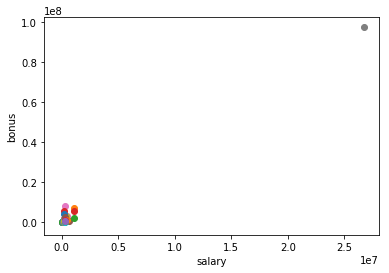

In [103]:
## Can I stay with this plot below? or if it is related to the diciotnary from before shall I removei it?

# We should check our data if it's clean enough to proceed with classfieres, that's the base for good analysis
# Let's focus on earning of employees, by making  a plot of salaries and bonus:

data_features = ["salary", "bonus"]

data = featureFormat(data_dict, data_features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")


In [104]:
# Just by reading the file with emails provided by Udacity we see that 'TOTAL' and 'NAN' values bring confusion 
# to the data. Let's remove it.

In [105]:
## This code below doesn't make sense after removing the dictionary : d_enron_dict = pickle.load(open("final_project_dataset.pkl", "r") )
## What am I supposed to do with this?

# As we can see there are some outliers that must be removed for further analysis.
# let's get rid off the total, which could cause a chaos. 
# After that we should remove all NANs and see the 6 top salaries as a list in Enron.

data_features = ["salary", "bonus"]

d_enron_dict.pop('TOTAL', 0)

data = featureFormat(d_enron_dict, features)

# I will put them in the list
outliers_list = []
for key in data_dict:
    val = d_enron_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers_list.append((key, int(val)))

outliers_final = (sorted(outliers_list,key=lambda x:x[1],reverse=True)[:6])

print outliers_final


NameError: name 'd_enron_dict' is not defined

In [67]:
## This also doesn't make any sense because it's a dictionary?

# Now we can see the graph without outliers. 
# 
d_enron_dict.pop('TOTAL',0)

data_features = ["salary", "bonus", "poi"]
data = featureFormat(d_enron_dict, data_features)


for point in data:
    salary = point[0]
    bonus = point[1]
    if point[2] == 1:
        matplotlib.pyplot.scatter( salary, bonus, color = 'orange' )
    else:
        matplotlib.pyplot.scatter( salary, bonus, color = 'grey' )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


NameError: name 'd_enron_dict' is not defined

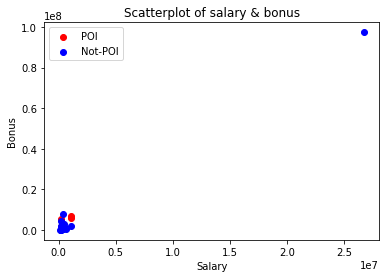

In [106]:
# Let's visualize the salaries and bonuses of ppl in enrone,that's a good way to find outliers

plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == True],enron_dataf["bonus"][enron_dataf["poi"] == True], color = 'r',
           label = "POI")
plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == False],enron_dataf["bonus"][enron_dataf["poi"] == False],color = 'b',
           label = "Not-POI")
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary & bonus")
plt.legend(loc='upper left')
plt.show() 

In [107]:
## So I removed the NaN values too, it's another outlier. Does it have to be visualized aswell?

# Removing the NaN values:
enron_dataf.replace(to_replace= 'NaN', value= 0,inplace=True)

In [114]:
# Now let't eliminate the 'Total' counts!
# The plot brought a more comprehensive view


enron_dataf.drop('TOTAL', axis = 0, inplace = True)

plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == True],enron_dataf["bonus"][enron_dataf["poi"] == True], color = 'r',
           label = "POI")
plt.scatter(enron_dataf["salary"][enron_dataf["poi"] == False],enron_dataf["bonus"][enron_dataf["poi"] == False],color = 'b',
           label = "Not-POI")
    
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Scatterplot of salary & bonus after removing outliers")
plt.legend(loc='upper left')
plt.show() 


AttributeError: 'dict' object has no attribute 'drop'

In [163]:
#### FEATURES
#2. Feature processing of the dataset about ENRON

In [109]:
## My features still don't work :(

# Created two new features in ratios:
enron_dataf[new_feature_from_meassages_to_poi_ratio] = enron_dataf['from_messages']/enron_dataf['from_poi_to_this_person']
enron_dataf[new_feature_to_messages_from_this_person_to_poi_ratio] = enron_dataf['to_messages']/enron_dataf['from_this_person_to_poi']

NameError: name 'new_feature_from_meassages_to_poi_ratio' is not defined

In [ ]:
# Now let's focus on choosing the features to indentify a POI
# I will use only the provided features, POI, financial and email as per below:

# POI

# Features with email: 'from_messages', 'shared_receipt_with_poi',['fraction_mail_from_poi', 'fraction_mail_to_poi', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'from_messages']

# Financial features: ['poi', 'salary', 'bonus','deferral_payments', 'expenses', 
#                 'restricted_stock_deferred', 'restricted_stock', 'deferred_income','total_payments',
#                 'exercised_stock_options', 'total_stock_value', 'restricted_stock']


In [110]:
features_list = ['poi', 'salary', 'bonus', 'deferral_payments', 'expenses', 
                 'restricted_stock_deferred', 'restricted_stock', 'deferred_income','total_payments',
                 'fraction_mail_to_poi', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 
                 'from_messages', 'shared_receipt_with_poi', 'exercised_stock_options',
                'total_stock_value', 'restricted_stock']

In [111]:
labels, features = targetFeatureSplit(enron_dataf)

In [112]:

enron_dataf = pickle.load(open("final_project_dataset.pkl", "r") )

In [35]:
# teraz ma być to ale nie bardzo wiem jak


In [36]:
# zmien to tez prosze
# I mus split data into training and testing datasets to run classifiers

from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.3, 
                                                                                             random_state=42)


In [115]:
## I don't understand why, but yesterday it was all working! Could it be because of the dataframe instead of diciotnary?

from sklearn.naive_bayes import GaussianNB

features_list = ["poi", "salary", "bonus", 'deferral_payments', 'expenses', 
                 'restricted_stock_deferred', 'restricted_stock', 'deferred_income','total_payments',
                 'fraction_mail_to_poi', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 
                 'from_messages', 'shared_receipt_with_poi', 'exercised_stock_options',
                'total_stock_value', 'restricted_stock']
t0 = time()
#zobacz czy mozna zmienic nazwe tego accuracy score i skad sie to wzielo
clf = GaussianNB()
clf.fit(features_train, labels_train)
accuracy = accuracy_score(labels_test, prediction)


print "Accuracy for GaussianNB:", accuracy

print "GaussianNB time of running algorithm:", round(time()-t0, 3), "s"

C:\Users\Marcela\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 102]

In [116]:
## I don't understand why, but yesterday it was all working! Could it be because of the dataframe instead of diciotnary?

# Another classifer is a Decision Tree,
# it gives certainly bigger accuracy


from sklearn.tree import DecisionTreeClassifier
# jak cos to to teraz dodalam wieczorem
from sklearn.metrics import accuracy_score

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"

ValueError: could not convert string to float: IMICHELE RICHARD G

In [117]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(features_train, labels_train)

C:\Users\Marcela\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 102]

In [118]:
## I don't understand why, but yesterday it was all working! Could it be because of the dataframe instead of diciotnary?

from sklearn.neighbors import KNeighborsClassifier


clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print "testing time: ", round(time()-t0, 3), "s"
print "Accuracy of DT classifer is  : ",accuracy_score(labels_test, prediction)

ValueError: could not convert string to float: IMICHELE RICHARD G

In [119]:

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
print "testing time: ", round(time()-t0, 3), "s"

ValueError: could not convert string to float: IMICHELE RICHARD G

In [ ]:
##Accuracy can be interpreted as : 85.2% predictions on the total test set have been made correctly.

#Precision can be interpreted as : if a person is being classified as a POI by my classifier then there is a 47.6% chance that the person is actually a POI. (i.e., a 47.6% chance of obtaining a true positive condition.)

#Recall can be interpreted as : of all the actual POIs considered, 37.7% of all the POIs can be classified correctly as a POI by my classifier.



In [ ]:
# Create final classifer/ czy to mialoby sens?
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_features=2, min_samples_split=2,
                             criterion='entropy', max_depth=None)

In [1]:
# to bylo po prostu to 
dump_classifier_and_data(clf, my_dataset, features_list)

NameError: name 'dump_classifier_and_data' is not defined

In [ ]:
# With 146 Enron employers, 18 of which are POIs, the dataset used is both small and is imbalanced. zmien to jakos